In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
# Add the parent directory of australia_rain to the system path
sys.path.append(r'C:\Users\karim\datascience')
from statistics_essential import StatEssentials
# # Apply square root transformation
# sqrt_transformed_data = np.square(original_data)

# # Plot square root-transformed data
# plt.figure(figsize=(12, 8))
# sns.histplot(sqrt_transformed_data, kde=True).set(title='Square Root Transformed Data')
# plt.show()
# # Apply log transformation
# log_transformed_data = np.log1p(original_data)

# # Plot log-transformed data
# plt.figure(figsize=(12, 8))
# sns.histplot(log_transformed_data, kde=True).set(title='Log Transformed Data')
# plt.show()

In [2]:
main_df = pd.read_csv('weatherAUS.csv')

In [3]:
main_df
main_df['Date'] =  pd.to_datetime(main_df['Date'])

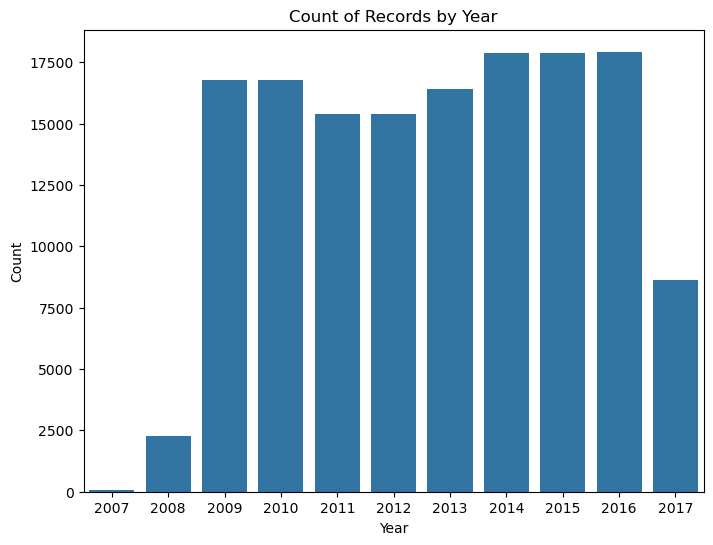

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x=main_df['Date'].dt.year)
plt.title('Count of Records by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [5]:
testing_ratio = len(main_df[main_df['Date'].dt.year > 2015 ]) / main_df.shape[0]

In [6]:
validation_set_ratio = len(main_df[main_df['Date'].dt.year == 2015 ]) / main_df.shape[0]

In [7]:
validation_set_ratio

0.12295476419634263

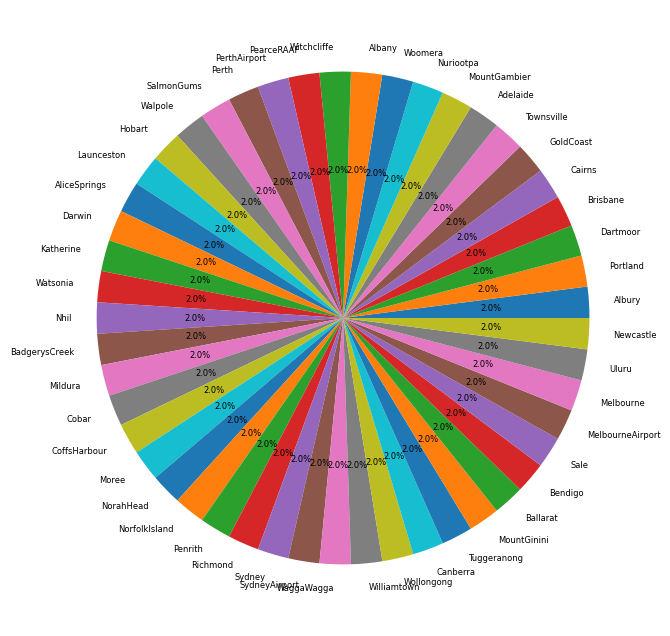

In [8]:
test_split = main_df[main_df['Date'].dt.year > 2015 ]
counts = test_split['Location'].value_counts()

labels = counts.index
plt.figure(figsize=(8, 8))
plt.pie(counts , labels = labels,textprops={'fontsize': 6},autopct='%1.1f%%')
plt.show()
# test_split_grouped = test_split.groupby('Location')
# for category, group in test_split_grouped:
#     print(f'category {category} no of rows {group.shape[0]} test {len(group)}')
    
    

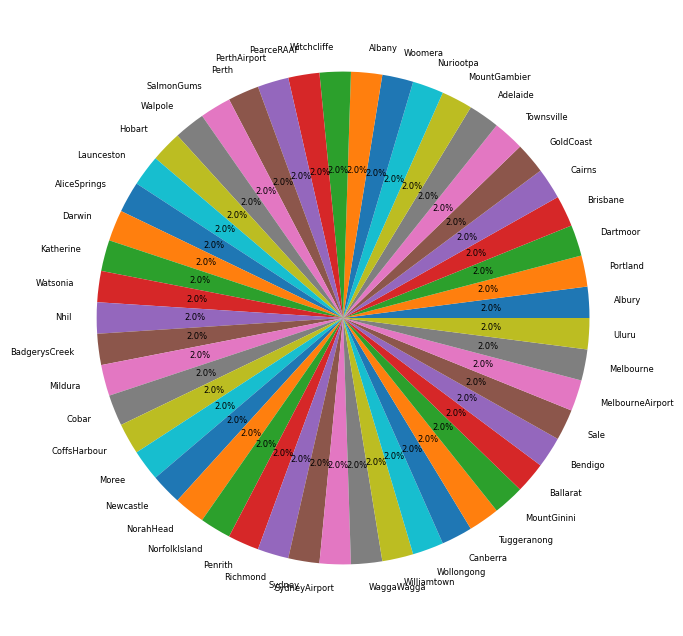

In [9]:
validation_split = main_df[main_df['Date'].dt.year == 2015]

counts = validation_split['Location'].value_counts()

labels = counts.index
plt.figure(figsize=(8, 8))
plt.pie(counts , labels = labels,textprops={'fontsize': 6},autopct='%1.1f%%')
plt.show()
# test_split_grouped = test_split.groupby('Location')
# for category, group in test_split_grouped:
#     print(f'category {category} no of rows {group.shape[0]} test {len(group)}')

In [10]:
training_split = main_df[main_df['Date'].dt.year < 2015]
training_split = training_split.dropna(subset = ['RainTomorrow'])
training_split


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


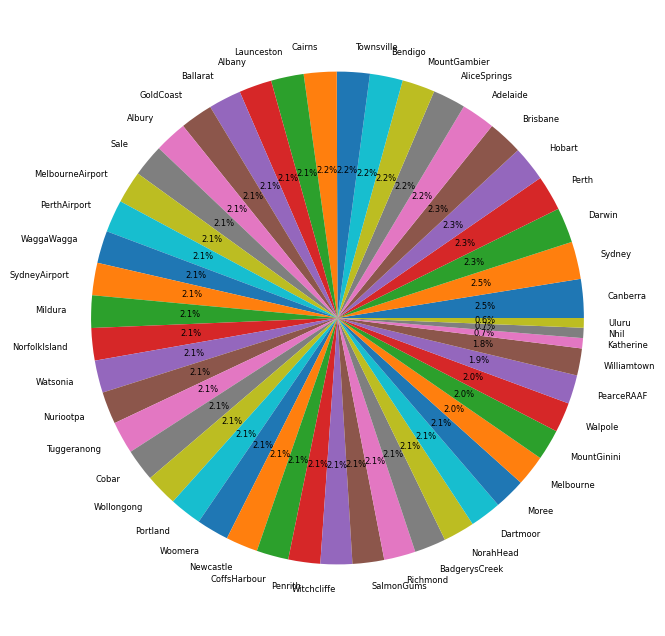

In [11]:
training_split
counts = training_split['Location'].value_counts()

labels = counts.index
plt.figure(figsize=(8, 8))
plt.pie(counts , labels = labels,textprops={'fontsize': 6},autopct='%1.1f%%')
plt.show()
# test_split_grouped = test_split.groupby('Location')
# for category, group in test_split_grouped:
#     print(f'category {category} no of rows {group.shape[0]} test {len(group)}')

In [12]:
total_rows = training_split.shape[0]
training_split.isna().sum() * 100 / total_rows

grouped_on_location = training_split.groupby('Location')

In [13]:
location_based_dataframes = []
list_of_location = []
for i , (location , group) in enumerate(grouped_on_location):
    list_of_location.append(location)
    location_based_dataframes.append({'location':location , 'df':group})

In [14]:
list_of_location[0]

'Adelaide'

In [15]:
print(location_based_dataframes[0]['df'].shape[0])
adelaide_df = location_based_dataframes[0]['df']
adelaide_df.isna().sum()
# adelaide_df.drop(columns = ['Cloud9am' , 'Cloud3pm'],inplace = True)

2191


Date                0
Location            0
MinTemp             1
MaxTemp             1
Rainfall           65
Evaporation       656
Sunshine          493
WindGustDir        16
WindGustSpeed      16
WindDir9am        147
WindDir3pm          8
WindSpeed9am        3
WindSpeed3pm        3
Humidity9am         3
Humidity3pm         3
Pressure9am         3
Pressure3pm         3
Cloud9am         2191
Cloud3pm         2191
Temp9am             3
Temp3pm             2
RainToday          65
RainTomorrow        0
dtype: int64

In [89]:
adelaide_df.drop(columns = ['Cloud9am' , 'Cloud3pm'],inplace = True)
adelaide_df.isna().sum()

Date                      0
Location                  0
MinTemp                   1
MaxTemp                   1
Rainfall                 65
Evaporation             656
Sunshine                493
WindGustDir              16
WindGustSpeed            16
WindDir9am              147
WindDir3pm                8
WindSpeed9am              3
WindSpeed3pm              3
Humidity9am               3
Humidity3pm               3
Pressure9am               3
Pressure3pm               3
Temp9am                   3
Temp3pm                   2
RainTomorrow_encoded      0
RainToday_encoded         0
dtype: int64

In [91]:
adelaide_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow_encoded,RainToday_encoded
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,13.0,15.0,92.0,67.0,1017.4,1017.7,13.5,14.9,0,1
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,13.0,15.0,75.0,52.0,1022.4,1022.6,13.7,15.5,0,0
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,2.0,11.0,81.0,56.0,1027.8,1026.5,9.3,13.9,0,0
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,6.0,13.0,71.0,46.0,1028.7,1025.6,10.2,15.3,0,0
96325,2008-07-06,Adelaide,11.3,15.7,NaN,NaN,1.5,NNW,52.0,NNE,...,15.0,22.0,62.0,62.0,1019.5,1016.2,13.0,14.4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98601,2014-12-27,Adelaide,11.5,25.9,0.0,18.6,NaN,SW,31.0,N,...,6.0,19.0,51.0,39.0,1021.2,1018.1,17.8,24.6,0,0
98602,2014-12-28,Adelaide,13.3,30.4,0.0,NaN,NaN,W,30.0,NNW,...,7.0,11.0,39.0,23.0,1015.3,1010.3,21.5,29.3,1,0
98603,2014-12-29,Adelaide,16.3,23.0,1.4,13.2,NaN,W,56.0,W,...,22.0,22.0,94.0,48.0,1008.1,1010.4,17.3,20.6,0,1
98604,2014-12-30,Adelaide,16.2,23.7,0.0,NaN,NaN,W,41.0,WSW,...,19.0,17.0,64.0,55.0,1016.0,1015.9,18.4,22.6,0,0


<Axes: xlabel='Evaporation', ylabel='Sunshine'>

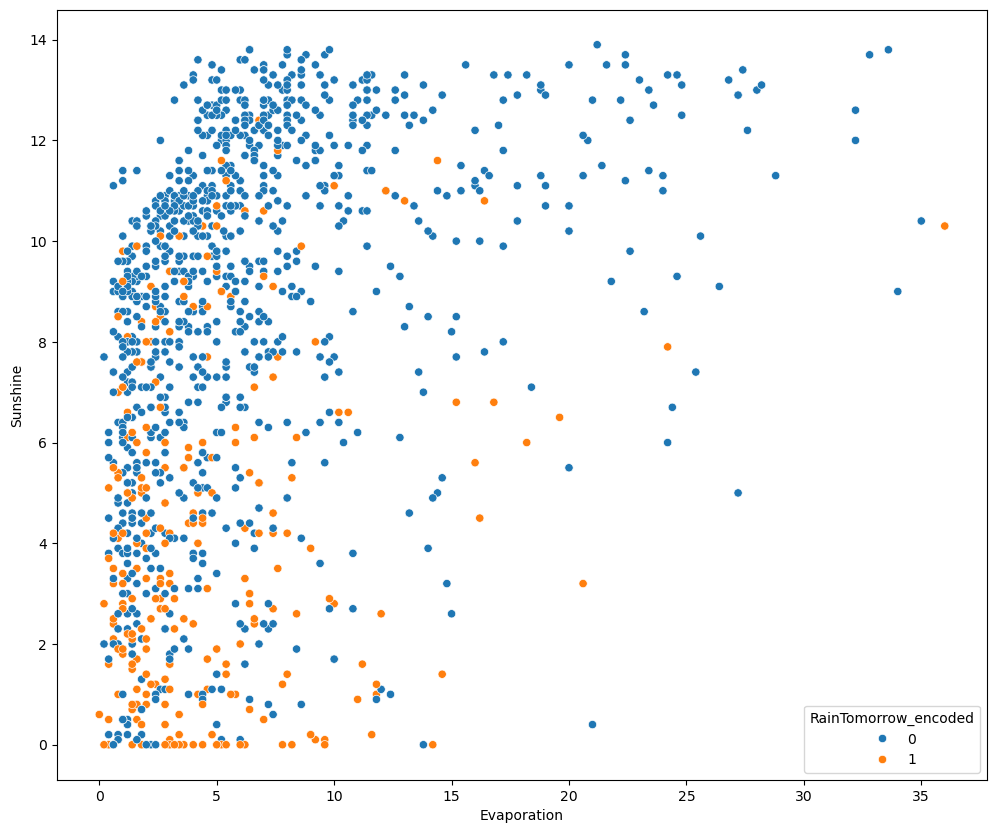

In [99]:
plt.figure(figsize = (12 , 10))
sns.scatterplot(x = adelaide_df['Evaporation'] , y = adelaide_df['Sunshine'] , hue = adelaide_df['RainTomorrow_encoded'])

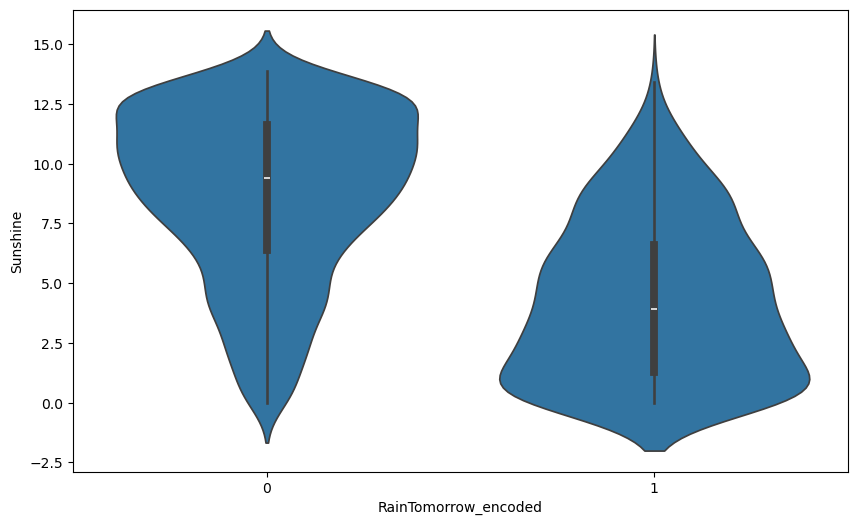

In [104]:
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot( x=adelaide_df['RainTomorrow_encoded'], y=adelaide_df['Sunshine'])

# Show the plot
plt.show()

<Axes: xlabel='Sunshine', ylabel='Density'>

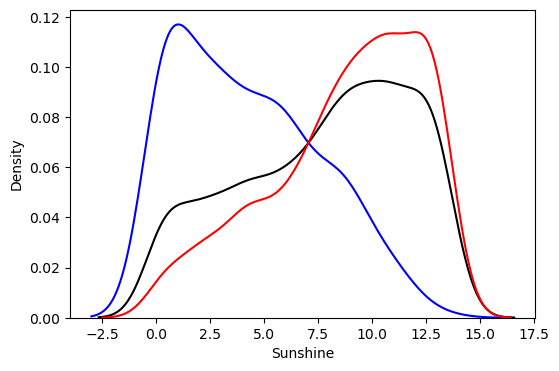

In [166]:
plt.figure(figsize=(6, 4))

sns.distplot(adelaide_df['Sunshine'], kde = True , hist = False , color = 'black')
# Create a violin plot
sns.distplot(adelaide_df[adelaide_df['RainTomorrow_encoded'] == 1]['Sunshine'], kde = True , hist = False , color = 'blue')
sns.distplot(adelaide_df[adelaide_df['RainTomorrow_encoded'] == 0]['Sunshine'] , kde = True , hist = False , color = 'red')




<h2> there seems to be a difference in the means but due to sunshine having so much null values I would prefer to drop it but if there is a significant relationship then I will have to apply Imputation techniques
</h2>

<h4>Im gonna perform a permutation test to check if the statistical difference is significant or not I cant perform t tests or krusk wallis test due to violations of the assumptions in the respective tests</h4>

In [198]:
sample1 = adelaide_df[adelaide_df['RainTomorrow_encoded'] == 1]['Sunshine'].dropna()
sample2 = adelaide_df[adelaide_df['RainTomorrow_encoded'] == 0]['Sunshine'].dropna()


In [194]:
def calculate_permutation_test(sample1 , sample2 , test_statistic_func, original_test_statistic , permutations):
    sample_1_len = len(sample1)
    sample_2_len = len(sample2)
    combined_sample = np.concatenate([sample1 , sample2])
    test_stat_distribution = []
    for _ in range(permutations):
        np.random.shuffle(combined_sample)
        perm_group1 = combined_sample[:sample_1_len]
        perm_group2 = combined_sample[sample_1_len:]
        test_stat_distribution.append(test_statistic_func(perm_group1 , perm_group2))
    return np.array(test_stat_distribution)
#difference in mean of two groups
def calc_test_stat(group1 , group2):
    return np.mean(group1) - np.mean(group2)
    

-4.497176401608782


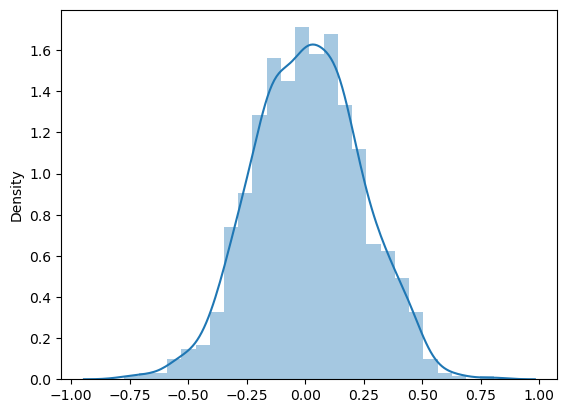

In [202]:
sns.distplot(calculate_permutation_test(sample1 , sample2 ,  calc_test_stat , 0.0, 1000) , kde = True)
print(calc_test_stat(sample1 , sample2))

<h2> my original test stat is -4.5 so obviously the p value is tiny and below the significance level of 0.05 alpha</h2>

<h2> i can confidently reject the null hypothesis so the sunshine column is significant so ill Have to include it my machine learning model </h2>